In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_path = "/content/drive/My Drive/gen_sort_df.csv"

In [ ]:
sort_df=pd.read_csv(model_path)
sort_df

,Age,Rating,Recommended IND,Positive Feedback Count,Talks
0,24,5,1,0,FlatteringI love this dress. i usually get an ...
1,21,5,1,0,Love these pantsThese pants are even better in...
2,23,5,1,0,Soft & lovelyThis poncho is so cute i love the...
3,27,5,1,4,Beautiful designI have a short torso and this ...
4,24,4,1,3,"Pretty, but not for me...I bought this top onl..."
...,...,...,...,...,...
1985,27,4,1,0,Love love love...just really sheerAbsolutely l...
1986,26,4,1,0,Love the pattern. the pants are really cute! p...
1987,26,5,1,1,Classic and sophisticatedI recently purchased ...
1988,24,3,1,0,Its okayThe pattern of this skirt is adorable ...


In [ ]:
# prompt: Using dataframe sort_df: delete column ratings and recommended IND, and Rename positive feedback count as likes

sort_df = sort_df.drop(['Rating', 'Recommended IND'], axis=1)
sort_df = sort_df.rename(columns={'Positive Feedback Count': 'Likes'})


In [ ]:
sort_df

,Age,Likes,Talks
0,24,0,FlatteringI love this dress. i usually get an ...
1,21,0,Love these pantsThese pants are even better in...
2,23,0,Soft & lovelyThis poncho is so cute i love the...
3,27,4,Beautiful designI have a short torso and this ...
4,24,3,"Pretty, but not for me...I bought this top onl..."
...,...,...,...
1985,27,0,Love love love...just really sheerAbsolutely l...
1986,26,0,Love the pattern. the pants are really cute! p...
1987,26,1,Classic and sophisticatedI recently purchased ...
1988,24,0,Its okayThe pattern of this skirt is adorable ...


In [ ]:
# prompt: Using dataframe sort_df: some graph on talks column

import altair as alt

# Create a bar chart of the number of talks for each unique value in the "Talks" column.
chart = alt.Chart(sort_df).mark_bar().encode(
    x=alt.X('Talks:N', title='Talks'),
    y='count()',
).properties(
    title='Number of Talks for Each Unique Value'
)

# Display the chart.
chart


alt.Chart(...)

In [ ]:
# prompt: Using dataframe sort_df: remove all rows with null talks

sort_df = sort_df[~sort_df['Talks'].isnull()]


In [ ]:
sort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 0 to 1989
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1930 non-null   int64 
 1   Likes   1930 non-null   int64 
 2   Talks   1930 non-null   object
dtypes: int64(2), object(1)
memory usage: 60.3+ KB


In [ ]:
chart = alt.Chart(sort_df).mark_bar().encode(
    x=alt.X('Talks:N', title='Talks'),
    y='count()',
).properties(
    title='Number of Talks for Each Unique Value'
)

# Display the chart.
chart

alt.Chart(...)

In [ ]:
# prompt: Using dataframe sort_df: bar graph for age


chart = alt.Chart(sort_df).mark_bar().encode(x='Age:Q', y='count()')
chart


alt.Chart(...)

In [ ]:
# prompt: Using dataframe sort_df: sort in descending order for rating, Recommended IND, Positive Feedback Count

sort_df=sort_df.sort_values(by=['Likes'], ascending=False)
sort_df


,Age,Likes,Talks
1069,23,98,"Super flattering, beautiful dressThis is my fa..."
1430,23,93,Stunning but has fit issuesThis top is beautif...
1075,27,57,Extremely flattering and comfortableLove love ...
1030,27,56,I saw this dress online and thought it looked ...
1193,23,38,Nothing specialI am wearing a medium in the ph...
...,...,...,...
880,25,0,"Perfect lightweight tee!I love, love this top!..."
878,20,0,Not for meThis dress is absolutely hideous on ...
877,23,0,This sweater has every special element i could...
876,22,0,Bright and colorful!Such a fun and beautiful s...


In [ ]:
sort_df.head(10)

,Age,Likes,Talks
1069,23,98,"Super flattering, beautiful dressThis is my fa..."
1430,23,93,Stunning but has fit issuesThis top is beautif...
1075,27,57,Extremely flattering and comfortableLove love ...
1030,27,56,I saw this dress online and thought it looked ...
1193,23,38,Nothing specialI am wearing a medium in the ph...
706,21,36,For the slim figureSuch quality went in to thi...
1752,24,33,WonderfulI love this dress! picked one up in s...
386,23,32,This dress is very cute and well made. unfortu...
1497,24,31,Beautiful and flowyI was a little apprehensive...
1377,26,30,Ordered this is the navy in a size m.....i'm 5...


# Data Preprocessing
First, let's load and clean the data. We'll preprocess the text by normalizing it (lowercasing, removing special characters, etc.) and tokenize the text for further analysis.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



# Data Cleaning and Preprocessing
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
    return ' '.join(tokens)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

sort_df['Cleaned_Talks'] = sort_df['Talks'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Topic Modeling
We'll use Latent Dirichlet Allocation (LDA) to identify key themes in the user discussions.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(sort_df['Cleaned_Talks'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, n_top_words)

# Print the top words for each topic
for topic, words in top_words.items():
    print(f"Topic {topic}: {', '.join(words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: look, love, like, wear, good, fit, great, fabric, soft, shirt
Topic 1: jacket, sweater, size, great, look, love, wear, cute, like, fit
Topic 2: fit, size, im, love, dress, small, like, perfect, wear, ordered
Topic 3: dress, love, shirt, perfect, flattering, color, great, look, like, pant
Topic 4: dress, love, fit, size, great, little, color, really, cute, beautiful


### Topic Breakdown
***Topic 0:***

*Keywords:* look, love, like, wear, good, fit, great, fabric, soft, shirt

*Interpretation:* This topic seems to be focused on general comments about the appearance, feel, and fit of clothing items, especially shirts. Words like "look," "love," "like," "wear," and "fit" indicate users' opinions on how the items look and feel when worn.


***Topic 1:***

*Keywords:* jacket, sweater, size, great, look, love, wear, cute, like, fit

*Interpretation:* This topic is centered around jackets and sweaters. It includes discussions about the size and fit of these items, as well as users' feelings toward them (e.g., "great," "love," "cute").

***Topic 2:***

*Keywords:* fit, size, im, love, dress, small, like, perfect, wear, ordered

*Interpretation:* This topic focuses on the fit and size of dresses. It includes words like "fit," "size," "small," "perfect," and "ordered," suggesting that users are discussing how well dresses fit and their sizing experiences.

***Topic 3:***

*Keywords:* dress, love, shirt, perfect, flattering, color, great, look, like, pant

*Interpretation:*  This topic includes discussions about dresses and shirts, with an emphasis on the appearance and flattering fit of these items. Words like "perfect," "flattering," and "color" indicate that users are commenting on the visual appeal and fit.

***Topic 4:***

*Keywords:* dress, love, fit, size, great, little, color, really, cute, beautiful

*Interpretation:* This topic is also about dresses, with a focus on their fit and color. Words like "cute," "beautiful," and "little" suggest that users are discussing the aesthetic qualities of dresses and their fit.

#  Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['Sentiment'] = df['Talks'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-34-e31fe3f9dd57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Talks'].apply(lambda x: sid.polarity_scores(x)['compound'])
<ipython-input-34-e31fe3f9dd57>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

# Entity Recognition
Using Named Entity Recognition (NER) to identify specific fashion items, brands, colors, and styles.

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Apply NER
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

sort_df['Entities'] = sort_df['Talks'].apply(extract_entities)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sort_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Likes,Talks,Cleaned_Talks,Entities
1069,23,98,"Super flattering, beautiful dressThis is my fa...",super flattering beautiful dressthis favorite ...,"[(the past year, DATE), (5'5 145lbs, DATE), (3..."
1430,23,93,Stunning but has fit issuesThis top is beautif...,stunning fit issuesthis top beautiful lace stu...,"[(0, CARDINAL), (145, CARDINAL), (34b, DATE), ..."
1075,27,57,Extremely flattering and comfortableLove love ...,extremely flattering comfortablelove love love...,"[(5'8, DATE), (122, CARDINAL), (34b, DATE), (a..."
1030,27,56,I saw this dress online and thought it looked ...,saw dress online thought looked ok happened se...,"[(today, DATE), (10-12, CARDINAL), (two, CARDI..."
1193,23,38,Nothing specialI am wearing a medium in the ph...,nothing speciali wearing medium photo referenc...,"[(38-30-40, CARDINAL)]"
...,...,...,...,...,...
880,25,0,"Perfect lightweight tee!I love, love this top!...",perfect lightweight teei love love top perfect...,"[(tee!I, ORG)]"
878,20,0,Not for meThis dress is absolutely hideous on ...,methis dress absolutely hideous physique order...,"[(6, CARDINAL)]"
877,23,0,This sweater has every special element i could...,sweater every special element could want form ...,[]
876,22,0,Bright and colorful!Such a fun and beautiful s...,bright colorfulsuch fun beautiful skirt absolu...,"[(a ton, QUANTITY), (first, ORDINAL)]"


In [ ]:
# prompt: save this dataset localy

sort_df.to_csv('ER_dataset.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Trend Visualization and Summarization
Visualizing trends using word clouds and trend graphs. We'll create a word cloud of the most frequent terms and a bar chart for sentiment analysis.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


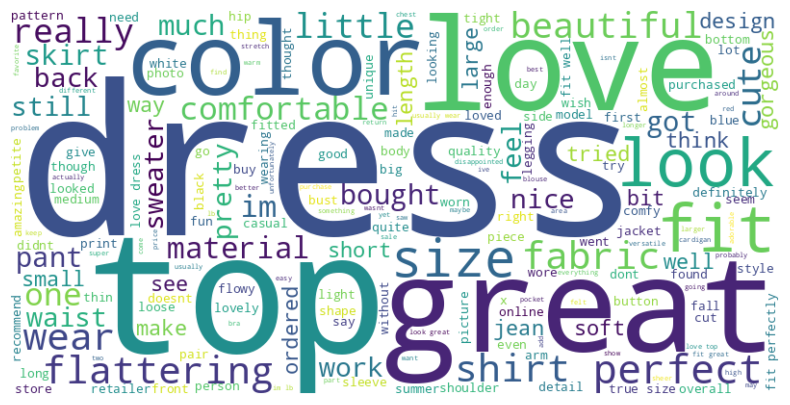

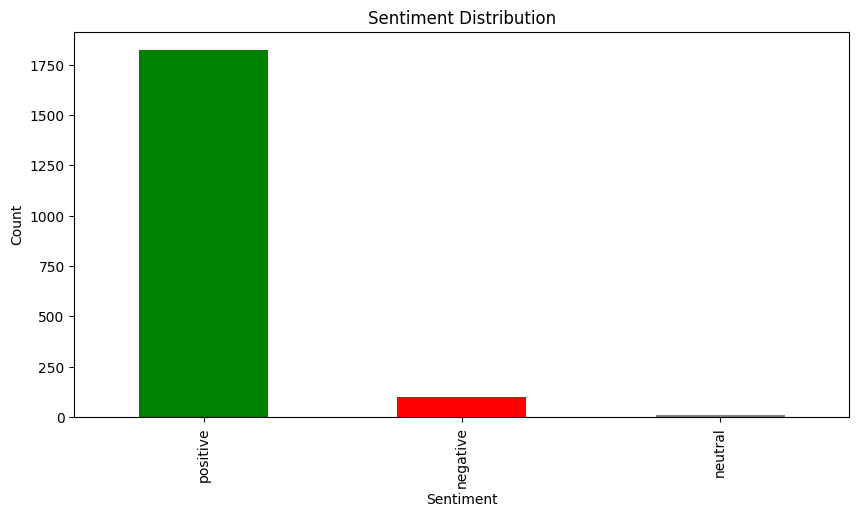

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
all_words = ' '.join(sort_df['Cleaned_Talks'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot sentiment distribution
sentiment_counts = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
